In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
df_input = pd.read_csv('Iris.csv')

In [ ]:
print('Shape of the dataset=',df_input.shape,'\n')
print('Sample rows of the dataset:\n\n',df_input.head(5),'\n')
print('Statistical Summary:\n',df_input.describe(),'\n')
print('Class Distribution:\n', df_input.groupby('Species').size(),'\n')

Shape of the dataset= (150, 6) 

Sample rows of the dataset:

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 

Statistical Summary:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.30

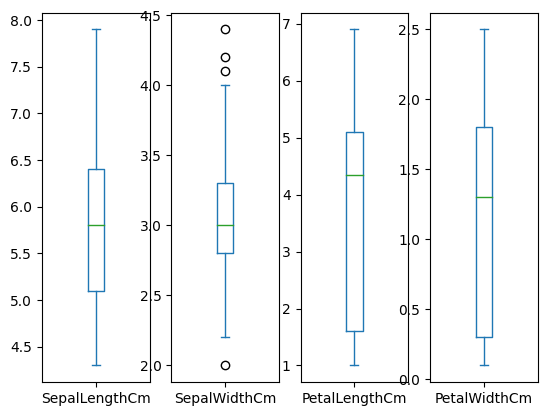

In [ ]:
df_input[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].plot(kind='box', subplots=True,sharex=False,sharey=False)
plt.show()

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

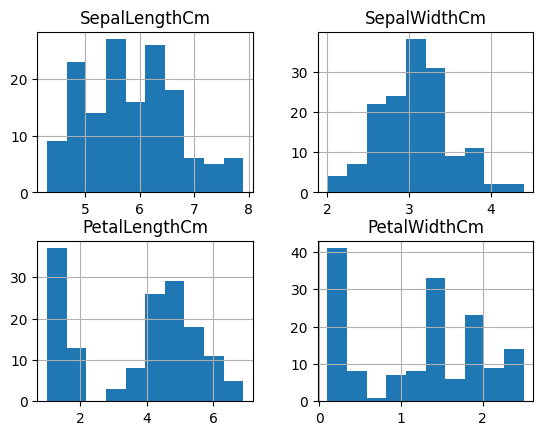

In [ ]:
df_input[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].hist()

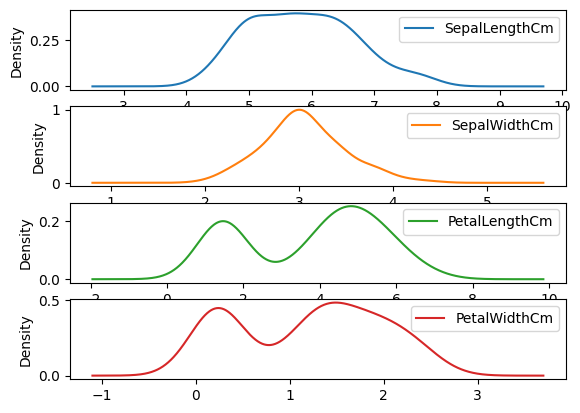

In [ ]:
df_input[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].plot(kind='kde', subplots=True,sharex=False,sharey=False)
plt.show()

array([[<Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='Petal

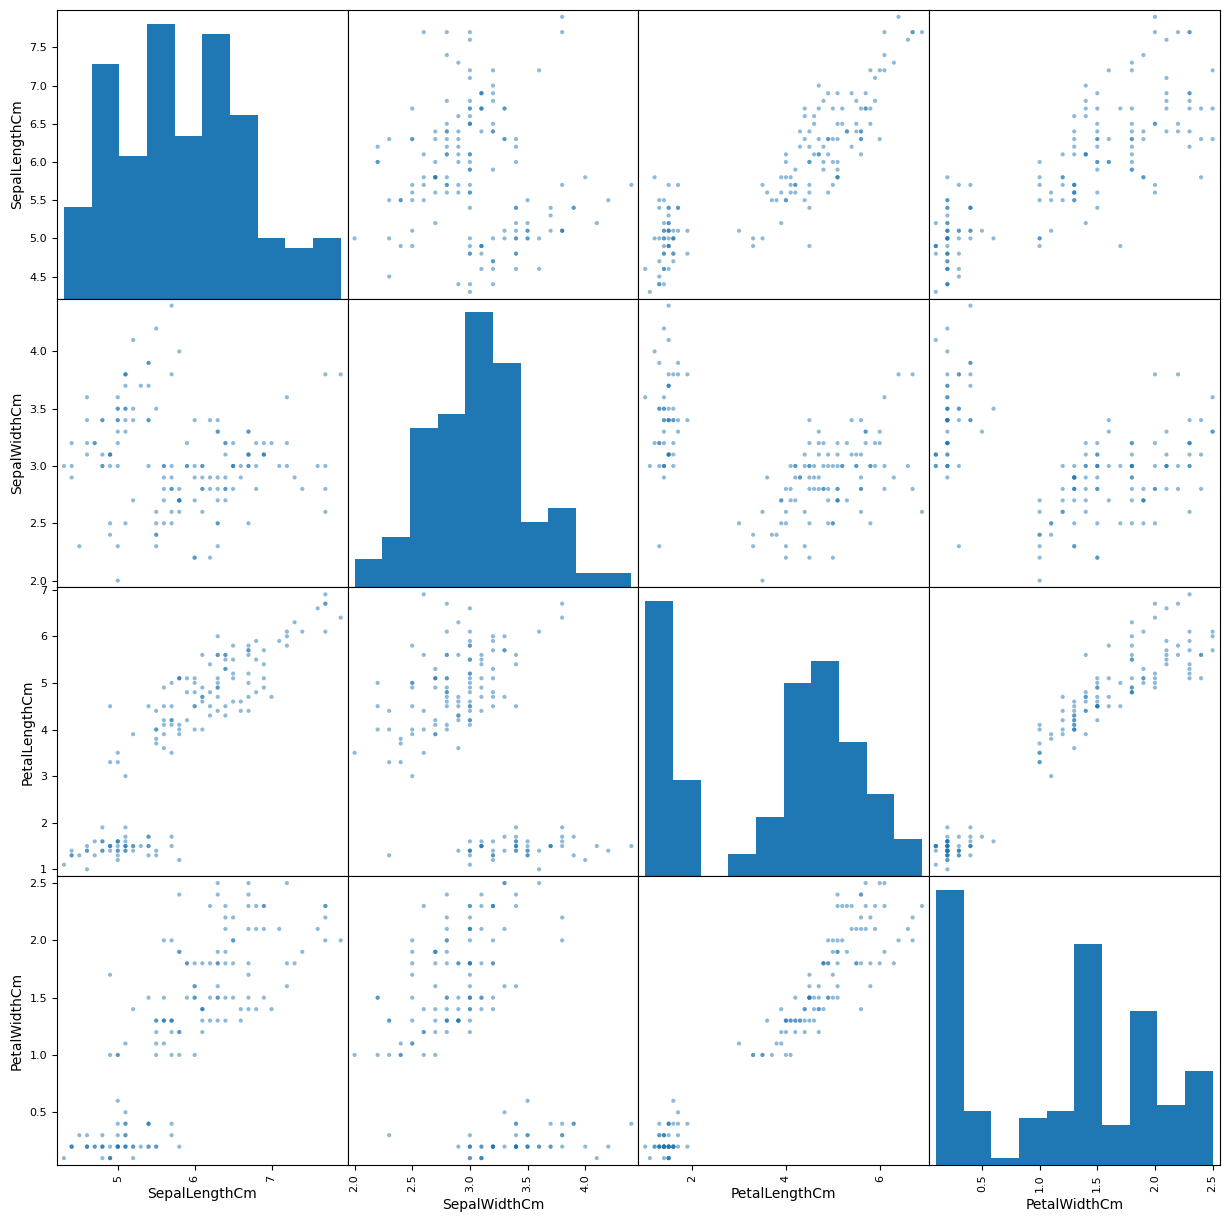

In [ ]:
scatter_matrix(df_input[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], figsize=(15,15))

In [ ]:
X=df_input[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=df_input['Species']
testsize=0.20
seed=7
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=testsize,random_state=seed)

In [ ]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


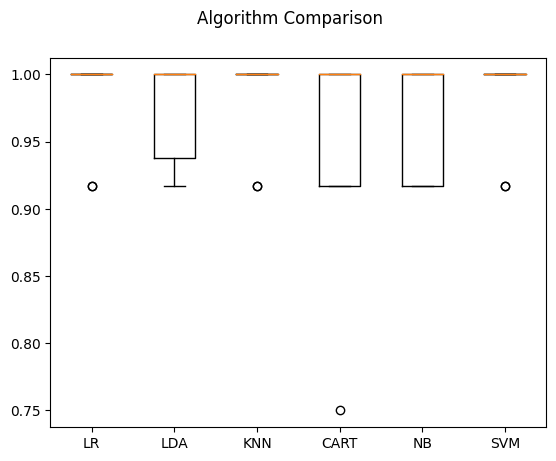

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from IPython.display import display

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print('\nAccuracy Score=',accuracy_score(Y_test, predictions))
confusion_mat = pd.crosstab(Y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(confusion_mat)
print(classification_report(Y_test, predictions))


Accuracy Score= 0.9


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,7,0,0,7
Iris-versicolor,0,11,1,12
Iris-virginica,0,2,9,11
All,7,13,10,30


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
from IPython.display import display

lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print('\nAccuracy Score=',accuracy_score(Y_test, predictions))
confusion_mat = pd.crosstab(Y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(confusion_mat)
print(classification_report(Y_test, predictions))


Accuracy Score= 0.8666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,7,0,0,7
Iris-versicolor,0,10,2,12
Iris-virginica,0,2,9,11
All,7,12,11,30


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [ ]:
from IPython.display import display

svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
print('\nAccuracy Score=',accuracy_score(Y_test, predictions))
confusion_mat = pd.crosstab(Y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(confusion_mat)
print(classification_report(Y_test, predictions))


Accuracy Score= 0.8666666666666667


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,7,0,0,7
Iris-versicolor,0,10,2,12
Iris-virginica,0,2,9,11
All,7,12,11,30


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

